<a href="https://colab.research.google.com/github/MERITOKAMIL/ML_PRO/blob/master/ML_PRO_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, validation_curve,GridSearchCV
from sklearn.metrics import accuracy_score

LOAD DATA

In [47]:
data=load_breast_cancer()
X=data.data
y=data.target

print(data.feature_names)
print(f"{X.shape =}")
print("y = ", np.unique(y, return_counts=True))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
X.shape =(569, 30)
y =  (array([0, 1]), array([212, 357]))


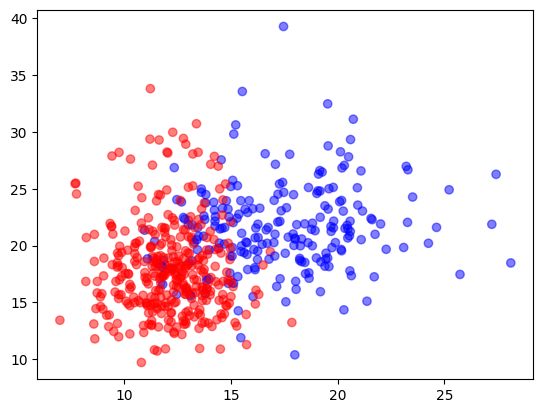

In [48]:
plt.scatter(X[:,0],X[:,1],c=y, alpha=0.5, cmap="bwr")
plt.show()

**Train Test Split**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"{X_train.shape =}")
print(f"{X_test.shape =}")
print(f"{y_train.shape =}")
print(f"{y_test.shape =}")

X_train.shape =(455, 30)
X_test.shape =(114, 30)
y_train.shape =(455,)
y_test.shape =(114,)


In [50]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

train_predictions=model.predict(X_train)
test_predictions=model.predict(X_test)

train_accuracy=accuracy_score(y_train,train_predictions)
test_accuracy=accuracy_score(y_test,test_predictions)

print(f"{train_accuracy = :.2f}")
print(f"{test_accuracy = :.2f}")

train_accuracy = 1.00
test_accuracy = 0.91


**Validation croisée**

In [51]:
model=KNeighborsClassifier(n_neighbors=1)
scores=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring="accuracy")
print(f" Score de validation croisé:{scores}")
print(f" Accuracy moyenne: {scores.mean():.2f}")

 Score de validation croisé:[0.94505495 0.89010989 0.9010989  0.94505495 0.92307692]
 Accuracy moyenne: 0.92


**Recherche du meilleur hyperparamètre N-neighbor**

In [52]:
k_scores={}
k=range(1,50)
for i in k:
    model=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring="accuracy")
    k_scores[i]=scores.mean()

In [53]:
k_scores

{1: 0.9208791208791209,
 2: 0.9164835164835166,
 3: 0.9318681318681319,
 4: 0.9230769230769231,
 5: 0.9208791208791209,
 6: 0.9252747252747253,
 7: 0.9274725274725275,
 8: 0.9340659340659341,
 9: 0.9362637362637363,
 10: 0.9340659340659341,
 11: 0.9318681318681319,
 12: 0.9296703296703297,
 13: 0.9362637362637363,
 14: 0.9340659340659341,
 15: 0.9230769230769231,
 16: 0.9274725274725275,
 17: 0.9230769230769231,
 18: 0.9252747252747253,
 19: 0.9208791208791209,
 20: 0.9230769230769231,
 21: 0.9186813186813186,
 22: 0.9164835164835164,
 23: 0.9142857142857143,
 24: 0.9142857142857143,
 25: 0.9142857142857143,
 26: 0.9164835164835164,
 27: 0.9142857142857143,
 28: 0.9164835164835164,
 29: 0.9120879120879121,
 30: 0.9142857142857143,
 31: 0.9120879120879121,
 32: 0.9142857142857143,
 33: 0.9142857142857143,
 34: 0.9142857142857143,
 35: 0.9120879120879121,
 36: 0.9120879120879121,
 37: 0.9120879120879121,
 38: 0.9142857142857143,
 39: 0.9142857142857143,
 40: 0.9142857142857143,
 41: 0.91

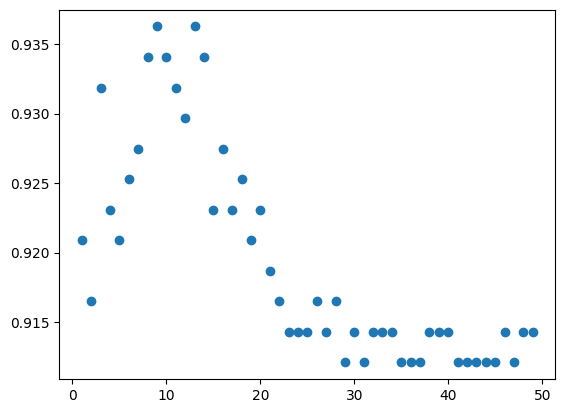

In [54]:
plt.scatter(k_scores.keys(),k_scores.values())
plt.show()

In [55]:
train_scores, validation_scores = validation_curve(estimator=KNeighborsClassifier(),
                                             X=X_train,
                                             y=y_train,
                                             param_name="n_neighbors",
                                             param_range=k,
                                             cv=5,
                                             scoring="accuracy"
)

In [56]:
validation_scores.shape

(49, 5)

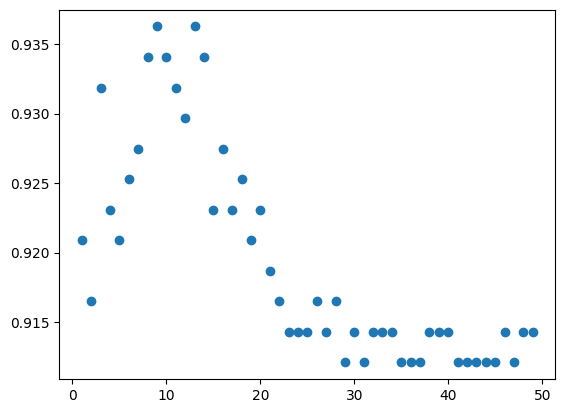

In [57]:
mean_scores=validation_scores.mean(axis=1)
plt.scatter(k,mean_scores)
plt.show()

**Optimisation des plusieurs hyperparametres**

In [58]:
param_grid={
  "n_neighbors":range(1,20),
  "metric":["minkowski","cosine","euclidean"],

}

grid_search=GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=5,
                        scoring="accuracy"
)
grid_search.fit(X_train,y_train)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=49),
             param_grid={'metric': ['minkowski', 'cosine', 'euclidean'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [61]:
grid_search.cv_results_.keys

<function dict.keys>

In [62]:
grid_search.cv_results_['params']

[{'metric': 'minkowski', 'n_neighbors': 1},
 {'metric': 'minkowski', 'n_neighbors': 2},
 {'metric': 'minkowski', 'n_neighbors': 3},
 {'metric': 'minkowski', 'n_neighbors': 4},
 {'metric': 'minkowski', 'n_neighbors': 5},
 {'metric': 'minkowski', 'n_neighbors': 6},
 {'metric': 'minkowski', 'n_neighbors': 7},
 {'metric': 'minkowski', 'n_neighbors': 8},
 {'metric': 'minkowski', 'n_neighbors': 9},
 {'metric': 'minkowski', 'n_neighbors': 10},
 {'metric': 'minkowski', 'n_neighbors': 11},
 {'metric': 'minkowski', 'n_neighbors': 12},
 {'metric': 'minkowski', 'n_neighbors': 13},
 {'metric': 'minkowski', 'n_neighbors': 14},
 {'metric': 'minkowski', 'n_neighbors': 15},
 {'metric': 'minkowski', 'n_neighbors': 16},
 {'metric': 'minkowski', 'n_neighbors': 17},
 {'metric': 'minkowski', 'n_neighbors': 18},
 {'metric': 'minkowski', 'n_neighbors': 19},
 {'metric': 'cosine', 'n_neighbors': 1},
 {'metric': 'cosine', 'n_neighbors': 2},
 {'metric': 'cosine', 'n_neighbors': 3},
 {'metric': 'cosine', 'n_neighb

In [63]:
grid_search.cv_results_['mean_test_score']

array([0.92087912, 0.91648352, 0.93186813, 0.92307692, 0.92087912,
       0.92527473, 0.92747253, 0.93406593, 0.93626374, 0.93406593,
       0.93186813, 0.92967033, 0.93626374, 0.93406593, 0.92307692,
       0.92747253, 0.92307692, 0.92527473, 0.92087912, 0.9010989 ,
       0.9010989 , 0.92087912, 0.91648352, 0.91868132, 0.91648352,
       0.92087912, 0.91868132, 0.92087912, 0.92527473, 0.92087912,
       0.91868132, 0.92527473, 0.92087912, 0.92307692, 0.91868132,
       0.91868132, 0.91428571, 0.91428571, 0.92087912, 0.91648352,
       0.93186813, 0.92307692, 0.92087912, 0.92527473, 0.92747253,
       0.93406593, 0.93626374, 0.93406593, 0.93186813, 0.92967033,
       0.93626374, 0.93406593, 0.92307692, 0.92747253, 0.92307692,
       0.92527473, 0.92087912])

In [65]:
params=grid_search.cv_results_['params']
scores=grid_search.cv_results_['mean_test_score']

grid_search_df=pd.DataFrame(params)
grid_search_df['score']=scores
grid_search_df

,metric,n_neighbors,score
0,minkowski,1,0.920879
1,minkowski,2,0.916484
2,minkowski,3,0.931868
3,minkowski,4,0.923077
4,minkowski,5,0.920879
5,minkowski,6,0.925275
6,minkowski,7,0.927473
7,minkowski,8,0.934066
8,minkowski,9,0.936264
9,minkowski,10,0.934066


In [68]:
grid_search_heatmap=grid_search_df.pivot(index='n_neighbors',columns='metric',values='score')
grid_search_heatmap

metric,cosine,euclidean,minkowski
n_neighbors,,,
1,0.901099,0.920879,0.920879
2,0.901099,0.916484,0.916484
3,0.920879,0.931868,0.931868
4,0.916484,0.923077,0.923077
5,0.918681,0.920879,0.920879
6,0.916484,0.925275,0.925275
7,0.920879,0.927473,0.927473
8,0.918681,0.934066,0.934066
9,0.920879,0.936264,0.936264


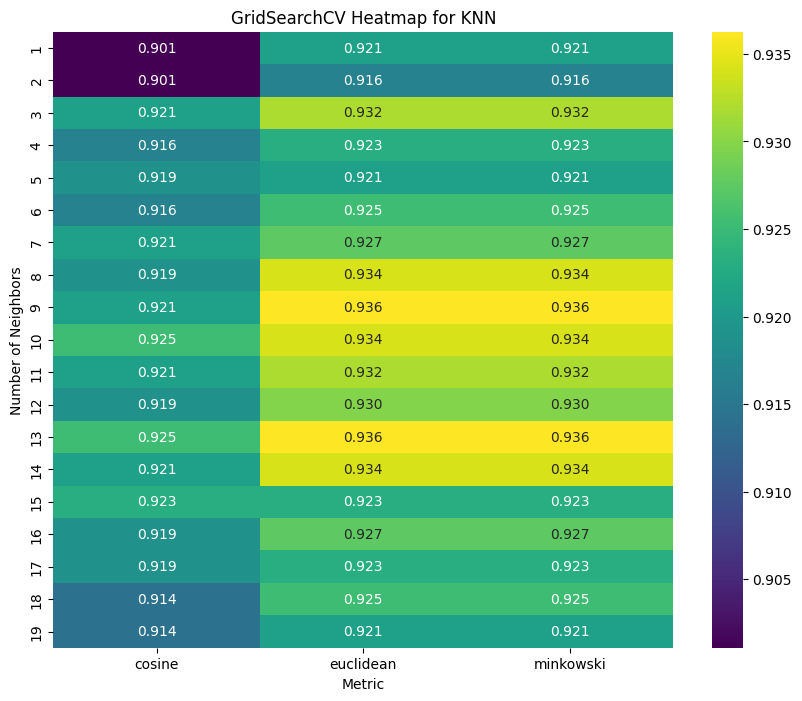

In [70]:
#plot de heatmap
plt.figure(figsize=(10,8))
sns.heatmap(grid_search_heatmap, annot=True, fmt=".3f",cmap="viridis")
plt.title("GridSearchCV Heatmap for KNN")
plt.xlabel("Metric")
plt.ylabel("Number of Neighbors")
plt.show()

In [71]:
print(f"Meilleur score: {grid_search.best_score_}")
print(f"Meilleur paramètre: {grid_search.best_params_}")

Meilleur score: 0.9362637362637363
Meilleur paramètre: {'metric': 'minkowski', 'n_neighbors': 9}


In [75]:
best_model=grid_search.best_estimator_
best_model
y_pred=best_model.predict(X_test)
test_accuracy=accuracy_score(y_test,y_pred)

print(f"Accuracy score: {test_accuracy}")

Accuracy score: 0.9649122807017544
